# Understanding the Problem and Data Preparation 

## Problem Definition
Clarify the goal of classifying credit risk of applicants using the available features in the dataset. The primary aim is to predict whether a loan application is of high risk or low risk based on financial and personal details provided by applicants.

## Data Loading and Initial Exploration
First, let's load the dataset and perform an initial exploration to understand its structure and data types. This includes:

- Viewing the first few rows to understand the format.
- Generating descriptive statistics to get an overview of numerical features.
- Checking for missing values or any inconsistencies in the data.

In [243]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring visuals
%matplotlib inline
sns.set_style("whitegrid")


In [244]:
# Load the dataset
data_path = '../data/german.data'
data = pd.read_csv(data_path, header=None, delim_whitespace=True)

# Displaying the first few rows of the dataset to ensure correct loading
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [245]:

# Column names based on the dataset attribute description
column_names = [
    "Status of Existing Checking Account", "Duration in Months", "Credit History",
    "Purpose", "Credit Amount", "Savings Account/Bonds", "Present Employment Since",
    "Installment Rate in Percentage of Disposable Income", "Personal Status and Sex",
    "Other Debtors/Guarantors", "Present Residence Since", "Property", "Age in Years",
    "Other Installment Plans", "Housing", "Number of Existing Credits at This Bank",
    "Job", "Number of People Liable to Provide Maintenance For", "Telephone",
    "Foreign Worker","Risk"
]

# Assign column names to the DataFrame
data.columns = column_names

# Verify the column names were added successfully
data.head()



,Status of Existing Checking Account,Duration in Months,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment Rate in Percentage of Disposable Income,Personal Status and Sex,Other Debtors/Guarantors,...,Property,Age in Years,Other Installment Plans,Housing,Number of Existing Credits at This Bank,Job,Number of People Liable to Provide Maintenance For,Telephone,Foreign Worker,Risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [246]:
data.dtypes

Status of Existing Checking Account                    object
Duration in Months                                      int64
Credit History                                         object
Purpose                                                object
Credit Amount                                           int64
Savings Account/Bonds                                  object
Present Employment Since                               object
Installment Rate in Percentage of Disposable Income     int64
Personal Status and Sex                                object
Other Debtors/Guarantors                               object
Present Residence Since                                 int64
Property                                               object
Age in Years                                            int64
Other Installment Plans                                object
Housing                                                object
Number of Existing Credits at This Bank                 int64
Job     

### Generate descriptive statistics:

In [247]:
# Generate descriptive statistics to understand the dataset's numerical distributions
display(data.describe())


,Duration in Months,Credit Amount,Installment Rate in Percentage of Disposable Income,Present Residence Since,Age in Years,Number of Existing Credits at This Bank,Number of People Liable to Provide Maintenance For,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Data Preprocessing
This includes several tasks such as:

- Cleaning the data by handling missing values and correcting any errors.
- Encoding categorical variables into numeric format using techniques like one-hot encoding, especially since many machine learning models require numerical input.
- Normalizing or standardizing numerical variables if required to ensure models function optimally.

### Check for missing values:

In [248]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Status of Existing Checking Account                    0
Duration in Months                                     0
Credit History                                         0
Purpose                                                0
Credit Amount                                          0
Savings Account/Bonds                                  0
Present Employment Since                               0
Installment Rate in Percentage of Disposable Income    0
Personal Status and Sex                                0
Other Debtors/Guarantors                               0
Present Residence Since                                0
Property                                               0
Age in Years                                           0
Other Installment Plans                                0
Housing                                                0
Number of Existing Credits at This Bank                0
Job                                                    0

In [249]:
data_text= data.copy()



descriptions = {
    'Status of Existing Checking Account': {
        'A11': '< 0 DM',
        'A12': '0 <= ... < 200 DM',
        'A13': '>= 200 DM / salary assignments for at least 1 year',
        'A14': 'no checking account'
    },
    'Credit History': {
        'A30': 'no credits taken/ all credits paid back duly',
        'A31': 'all credits at this bank paid back duly',
        'A32': 'existing credits paid back duly till now',
        'A33': 'delay in paying off in the past',
        'A34': 'critical account/ other credits existing (not at this bank)'
    },
    'Purpose': {
        'A40': 'car (new)',
        'A41': 'car (used)',
        'A42': 'furniture/equipment',
        'A43': 'radio/television',
        'A44': 'domestic appliances',
        'A45': 'repairs',
        'A46': 'education',
        'A47': '(vacation - does not exist?)',
        'A48': 'retraining',
        'A49': 'business',
        'A410': 'others'
    },
    'Savings Account/Bonds': {
        'A61': '< 100 DM',
        'A62': '100 <= ... < 500 DM',
        'A63': '500 <= ... < 1000 DM',
        'A64': '>= 1000 DM',
        'A65': 'unknown/ no savings account'
    },
    'Present Employment Since': {
        'A71': 'unemployed',
        'A72': '< 1 year',
        'A73': '1 <= ... < 4 years',
        'A74': '4 <= ... < 7 years',
        'A75': '>= 7 years'
    },
    'Personal Status and Sex': {
        'A91': 'male: divorced/separated',
        'A92': 'female: divorced/separated/married',
        'A93': 'male: single',
        'A94': 'male: married/widowed',
        'A95': 'female: single'
    },
    'Other Debtors/Guarantors': {
        'A101': 'none',
        'A102': 'co-applicant',
        'A103': 'guarantor'
    },
    'Property': {
        'A121': 'real estate',
        'A122': 'building society savings agreement/ life insurance',
        'A123': 'car or other, not in attribute 6',
        'A124': 'unknown / no property'
    },
    'Other Installment Plans': {
        'A141': 'bank',
        'A142': 'stores',
        'A143': 'none'
    },
    'Housing': {
        'A151': 'rent',
        'A152': 'own',
        'A153': 'for free'
    },
    'Job': {
        'A171': 'unemployed/ unskilled - non-resident',
        'A172': 'unskilled - resident',
        'A173': 'skilled employee / official',
        'A174': 'management/ self-employed/ highly qualified employee/ officer'
    },
    'Telephone': {
        'A191': 'none',
        'A192': 'yes, registered under the customer\'s name'
    },
    'Foreign Worker': {
        'A201': 'yes',
        'A202': 'no'
    }
}


for column in descriptions:
        if column in data_text.columns:
            # Mapa de códigos a descripciones para la columna actual
            code_to_description = descriptions[column]
            # Aplicar el mapa a la columna
            data_text[column] = data_text[column].map(code_to_description).fillna(data_text[column])
            
data_text.head()

,Status of Existing Checking Account,Duration in Months,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment Rate in Percentage of Disposable Income,Personal Status and Sex,Other Debtors/Guarantors,...,Property,Age in Years,Other Installment Plans,Housing,Number of Existing Credits at This Bank,Job,Number of People Liable to Provide Maintenance For,Telephone,Foreign Worker,Risk
0,< 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male: single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customer's name",yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female: divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 <= ... < 7 years,2,male: single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,1
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male: single,guarantor,...,building society savings agreement/ life insur...,45,none,for free,1,skilled employee / official,2,none,yes,1
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male: single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,2


In [250]:

# Isolate categorical columns
categorical_columns = data.dtypes[data.dtypes == 'object'].index.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: ['Status of Existing Checking Account', 'Credit History', 'Purpose', 'Savings Account/Bonds', 'Present Employment Since', 'Personal Status and Sex', 'Other Debtors/Guarantors', 'Property', 'Other Installment Plans', 'Housing', 'Job', 'Telephone', 'Foreign Worker']


In [251]:
# Identify ordinal variables and numerical booleans
for col in categorical_columns:
    num_unique_values = data[col].nunique()
    print(col, num_unique_values)

Status of Existing Checking Account 4
Credit History 5
Purpose 10
Savings Account/Bonds 5
Present Employment Since 5
Personal Status and Sex 4
Other Debtors/Guarantors 3
Property 4
Other Installment Plans 3
Housing 3
Job 4
Telephone 2
Foreign Worker 2


In [252]:
# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_columns:
    num_unique_values = data[col].nunique()
    if num_unique_values == 2:
        # Boolean numerical encoding
        data[col] = data[col].astype('category').cat.codes
    elif num_unique_values > 2:
        # Ordinal enco
        data[col] = label_encoder.fit_transform(data[col])

data.dtypes

Status of Existing Checking Account                    int32
Duration in Months                                     int64
Credit History                                         int32
Purpose                                                int32
Credit Amount                                          int64
Savings Account/Bonds                                  int32
Present Employment Since                               int32
Installment Rate in Percentage of Disposable Income    int64
Personal Status and Sex                                int32
Other Debtors/Guarantors                               int32
Present Residence Since                                int64
Property                                               int32
Age in Years                                           int64
Other Installment Plans                                int32
Housing                                                int32
Number of Existing Credits at This Bank                int64
Job                     

In [253]:
data.head()


,Status of Existing Checking Account,Duration in Months,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment Rate in Percentage of Disposable Income,Personal Status and Sex,Other Debtors/Guarantors,...,Property,Age in Years,Other Installment Plans,Housing,Number of Existing Credits at This Bank,Job,Number of People Liable to Provide Maintenance For,Telephone,Foreign Worker,Risk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


## Preprocessing

In [254]:
data.describe()

,Status of Existing Checking Account,Duration in Months,Credit History,Purpose,Credit Amount,Savings Account/Bonds,Present Employment Since,Installment Rate in Percentage of Disposable Income,Personal Status and Sex,Other Debtors/Guarantors,...,Property,Age in Years,Other Installment Plans,Housing,Number of Existing Credits at This Bank,Job,Number of People Liable to Provide Maintenance For,Telephone,Foreign Worker,Risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.577000,20.903000,2.54500,3.277000,3271.258000,1.105000,2.384000,2.973000,1.68200,0.145000,...,1.358000,35.546000,1.675000,0.929000,1.407000,1.904000,1.155000,0.404000,0.037000,1.300000
std,1.257638,12.058814,1.08312,2.739302,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,250.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,12.000000,2.00000,1.000000,1365.500000,0.000000,2.000000,2.000000,1.00000,0.000000,...,0.000000,27.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
50%,1.000000,18.000000,2.00000,3.000000,2319.500000,0.000000,2.000000,3.000000,2.00000,0.000000,...,1.000000,33.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,24.000000,4.00000,4.000000,3972.250000,2.000000,4.000000,4.000000,2.00000,0.000000,...,2.000000,42.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,2.000000
max,3.000000,72.000000,4.00000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.00000,2.000000,...,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000


In [255]:
def summarize_data(data):
    summary = []

    for column in data.columns:
        column_data = data[column]
        col_type = column_data.dtype
        num_unique = column_data.nunique()
        num_missing = column_data.isnull().sum()

        if pd.api.types.is_numeric_dtype(column_data):
            mean = column_data.mean()
            median = column_data.median()
            std_dev = column_data.std()
            skewness = column_data.skew()
            kurtosis = column_data.kurtosis()
            iqr = column_data.quantile(0.75) - column_data.quantile(0.25)
            summary.append([column, col_type, num_unique, num_missing, mean, median, std_dev, skewness, kurtosis, iqr, None])
        else:
            most_common = column_data.mode().iloc[0]
            summary.append([column, col_type, num_unique, num_missing, None, None, None, None, None, None, most_common])

    summary_df = pd.DataFrame(summary, columns=[
        'Column', 'Data Type', 'Unique Values', 'Missing Values',
        'Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis', 'IQR', 'Most Common'
    ])

    return summary_df

def categorize_skewness(skewness):
    if abs(skewness) >= 0 and abs(skewness) <= 0.3:
        return 'Mild'
    elif abs(skewness) > 0.3 and abs(skewness) <= 0.5:
        return 'Moderate'
    elif abs(skewness) > 0.5 and abs(skewness) <= 0.7:
        return 'Strong'
    elif abs(skewness) >= 0.71:
        return 'Very Strong'
    else:
        return 'Unknown'

In [256]:

summary_df = summarize_data(data)
print(summary_df)

                                               Column Data Type  \
0                 Status of Existing Checking Account     int32   
1                                  Duration in Months     int64   
2                                      Credit History     int32   
3                                             Purpose     int32   
4                                       Credit Amount     int64   
5                               Savings Account/Bonds     int32   
6                            Present Employment Since     int32   
7   Installment Rate in Percentage of Disposable I...     int64   
8                             Personal Status and Sex     int32   
9                            Other Debtors/Guarantors     int32   
10                            Present Residence Since     int64   
11                                           Property     int32   
12                                       Age in Years     int64   
13                            Other Installment Plans     int3

In [257]:
kurtosis = summary_df[summary_df["Kurtosis"]>3]
kurtosis

,Column,Data Type,Unique Values,Missing Values,Mean,Median,Standard Deviation,Skewness,Kurtosis,IQR,Most Common
4,Credit Amount,int64,921,0,3271.258,2319.5,2822.736876,1.949628,4.292590,2606.75,None
9,Other Debtors/Guarantors,int32,3,0,0.145,0.0,0.477706,3.264249,9.328756,0.00,None
19,Foreign Worker,int8,2,0,0.037,0.0,0.188856,4.913027,22.182198,0.00,None


In [258]:
summary_df['Skewness Category'] = summary_df['Skewness'].apply(categorize_skewness)
summary_df['Skewness Category'].value_counts()

Skewness Category
Very Strong    10
Mild            6
Moderate        3
Strong          2
Name: count, dtype: int64

In [259]:
data_trans=data.copy()

In [260]:
from scipy import stats

for i in range(6):
    for col in data_trans.columns:
        skew_value = data_trans[col].skew()
        
        if 0.5 < abs(skew_value) <= 0.7:
            if skew_value > 0:
                # Aplicar transformación de Box-Cox si todos los valores son positivos
                if (data_trans[col] > 0).all():
                    data_trans[col], _ = stats.boxcox(data_trans[col] + 1)
                else:
                    data_trans[col] = stats.yeojohnson(data_trans[col])[0]
            else:
                data_trans[col] = stats.yeojohnson(data_trans[col])[0]
        
        elif abs(skew_value) > 0.7:
            if skew_value > 0:
                # Aplicar transformación de Box-Cox si todos los valores son positivos
                if (data_trans[col] > 0).all():
                    data_trans[col], _ = stats.boxcox(data_trans[col] + 1)
                else:
                    data_trans[col] = stats.yeojohnson(data_trans[col])[0]
            else:
                data_trans[col] = stats.yeojohnson(data_trans[col])[0]

In [261]:
summary_trans = summarize_data(data_trans)
summary_trans['Skewness Category'] = summary_trans['Skewness'].apply(categorize_skewness)
summary_trans['Skewness Category'].value_counts()

Skewness Category
Mild           15
Moderate        5
Very Strong     1
Name: count, dtype: int64

In [262]:
summary_trans[summary_trans["Kurtosis"]>3]

,Column,Data Type,Unique Values,Missing Values,Mean,Median,Standard Deviation,Skewness,Kurtosis,IQR,Most Common,Skewness Category
19,Foreign Worker,float64,2,0,1.592213e-07,0.0,8.127009e-07,0.0,22.182198,0.0,None,Mild


## Exploratory Data Analysis (EDA)
With the data cleaned and preprocessed, let’s dive into a more detailed exploratory analysis. This step will help us understand deeper patterns and potential relationships in the data that could inform the model training phase.

### Univariate Analysis
Begin by examining the distribution of key variables, particularly the target variable if it’s defined, and other significant predictors.

In [263]:


def univariate_plot(data, column, axs, index):
    """
    Generates a histogram and a boxplot (for numerical data) or a countplot (for categorical data)
    for a given column of a DataFrame.
    
    Args:
    data (DataFrame): The DataFrame containing the data.
    column (str): Name of the column to analyze.
    axs (array): Array of subplots.
    index (int): Index for the subplot.
    """
    # Verify that the column exists in the DataFrame
    if column not in data.columns:
        print(f"Column '{column}' not found in the DataFrame")
        return
    
    if pd.api.types.is_numeric_dtype(data[column]):
        # Histogram using data
        sns.histplot(data[column], kde=False, ax=axs[index, 0], color='blue')
        axs[index, 0].set_title(f'Distribution of {column}')
        axs[index, 0].axvline(data[column].mean(), color='r', linestyle='--', label='Mean')
        axs[index, 0].axvline(data[column].median(), color='g', linestyle='-', label='Median')
        axs[index, 0].legend()
        
        # Boxplot using data
        sns.boxplot(x=data[column], ax=axs[index, 1], color='cyan')
        axs[index, 1].set_title(f'Boxplot of {column}')
    else:
        # Countplot using data
        sns.countplot(x=data[column], ax=axs[index, 0], color='blue')
        axs[index, 0].set_title(f'Countplot of {column}')
        
        # Countplot using data (duplicated for consistent layout)
        sns.countplot(x=data[column], ax=axs[index, 1], color='cyan')
        axs[index, 1].set_title(f'Countplot of {column}')
    
def plot_all_columns(data):
    """
    Plots all columns of a DataFrame using univariate_plot function.
    
    Args:
    data (DataFrame): The DataFrame containing the data.
    """
    num_columns = len(data.columns)
    fig, axs = plt.subplots(num_columns, 2, figsize=(15, 5 * num_columns))
    
    for index, column in enumerate(data.columns):
        univariate_plot(data, column, axs, index)
    
    plt.tight_layout()
    plt.show()



In [264]:
def count_outliers(data, column):
    # Calcular el primer y tercer cuartil
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1
    
    # Definir los límites para los outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Contar los outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_outliers = outliers.shape[0]
    
    return num_outliers

In [265]:
"plot_all_columns(data)"

'plot_all_columns(data)'

In [266]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Preprocesamiento de datos
# Convertir variables categóricas a numéricas
df_encoded = data.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Separar características y variable objetivo
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos
models_base = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=300)
}

# Entrenar y evaluar los modelos
results = {}
for model_name, model in models_base.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }



results_df = pd.DataFrame(results).T


In [267]:
from imblearn.over_sampling import SMOTE

df_encoded = data.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

# Aplicar SMOTE para balancear las clases
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over, y_over = sm.fit_resample(X, y)

# Verificar las dimensiones después de aplicar SMOTE
print("Dimensiones de X después de SMOTE:", X_over.shape)
print("Dimensiones de y después de SMOTE:", y_over.shape)
print("Distribución de clases después de SMOTE:", pd.Series(y_over).value_counts())

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir los modelos
models_over = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier(max_iter=300)
}

# Entrenar y evaluar los modelos
results_over = {}
for model_name, model in models_over.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results_over[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

results_over = pd.DataFrame(results_over).T

Dimensiones de X después de SMOTE: (1400, 20)
Dimensiones de y después de SMOTE: (1400,)
Distribución de clases después de SMOTE: Risk
1    700
2    700
Name: count, dtype: int64


In [268]:
results_df

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Logistic Regression,0.78,0.76924,0.78,0.768651,"[[127, 14], [30, 29]]"
Decision Tree,0.715,0.7033,0.715,0.707641,"[[117, 24], [33, 26]]"
Random Forest,0.78,0.770442,0.78,0.760542,"[[131, 10], [34, 25]]"
SVM,0.78,0.769567,0.78,0.762752,"[[130, 11], [33, 26]]"
Neural Network,0.76,0.757713,0.76,0.758776,"[[118, 23], [25, 34]]"


In [269]:
results_over

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Logistic Regression,0.803571,0.808418,0.803571,0.803684,"[[114, 35], [20, 111]]"
Decision Tree,0.735714,0.737455,0.735714,0.735984,"[[108, 41], [33, 98]]"
Random Forest,0.828571,0.828796,0.828571,0.828642,"[[124, 25], [23, 108]]"
SVM,0.85,0.852475,0.85,0.850153,"[[123, 26], [16, 115]]"
Neural Network,0.810714,0.813589,0.810714,0.8109,"[[117, 32], [21, 110]]"


In [270]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para Grid Search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Crear los modelos
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='precision')
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='precision')
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='precision')
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='precision')

# Entrenar los modelos
grid_lr.fit(X_train_scaled, y_train)
grid_dt.fit(X_train_scaled, y_train)
grid_rf.fit(X_train_scaled, y_train)
grid_svm.fit(X_train_scaled, y_train)

# Evaluar los mejores modelos
models_grid = {
    "Logistic Regression": grid_lr.best_estimator_,
    "Decision Tree": grid_dt.best_estimator_,
    "Random Forest": grid_rf.best_estimator_,
    "SVM": grid_svm.best_estimator_
}

best_results = {}
for model_name, model in models_grid.items():
    y_pred = model.predict(X_test_scaled)
    best_results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Convertir resultados a DataFrame
grid_results = pd.DataFrame(best_results).T




In [271]:
# Definir el clasificador
mlp = MLPClassifier(max_iter=300)

# Definir los hiperparámetros a probar
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (100,), (100,100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Búsqueda en cuadrícula
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train_scaled, y_train)

# Obtener el mejor modelo y sus parámetros
best_mlp = clf.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_mlp = best_mlp.predict(X_test_scaled)

# Calcular métricas de rendimiento
mlp_results = {
    "Accuracy": accuracy_score(y_test, y_pred_mlp),
    "Precision": precision_score(y_test, y_pred_mlp, average='weighted'),
    "Recall": recall_score(y_test, y_pred_mlp, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_mlp, average='weighted'),
    "Confusion Matrix": confusion_matrix(y_test, y_pred_mlp)
}

# Convertir resultados a DataFrame
mlp_results_df = pd.DataFrame([mlp_results], index=["Neural Network"])

# Anexar a grid_results
grid_results = pd.concat([grid_results, mlp_results_df])

# Mostrar los resultados ordenados por Accuracy
grid_results_sorted = grid_results.sort_values(by='Accuracy', ascending=False)

In [272]:
grid_results

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
Logistic Regression,0.814286,0.821044,0.814286,0.814286,"[[114, 35], [17, 114]]"
Decision Tree,0.767857,0.767764,0.767857,0.767801,"[[117, 32], [33, 98]]"
Random Forest,0.817857,0.823986,0.817857,0.817897,"[[115, 34], [17, 114]]"
SVM,0.85,0.855688,0.85,0.850061,"[[120, 29], [13, 118]]"
Neural Network,0.835714,0.840133,0.835714,0.835832,"[[119, 30], [16, 115]]"


In [273]:
from sklearn.ensemble import StackingClassifier

# Crear los modelos base y el modelo meta usando los mejores parámetros encontrados en Grid Search
estimators = [
    ('lr', LogisticRegression(C=grid_lr.best_params_['C'], penalty=grid_lr.best_params_['penalty'], solver='liblinear')),
    ('rf', RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'], min_samples_split=grid_rf.best_params_['min_samples_split'], min_samples_leaf=grid_rf.best_params_['min_samples_leaf'])),
    ('svm', SVC(C=grid_svm.best_params_['C'], gamma=grid_svm.best_params_['gamma'], kernel='rbf', probability=True))
]

# Definir el modelo de Stacking con un estimador final
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Entrenar el modelo de stacking
stacking_clf.fit(X_train_scaled, y_train)

# Evaluar el modelo de stacking
y_pred = stacking_clf.predict(X_test_scaled)
stacking_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall": recall_score(y_test, y_pred, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred, average='weighted'),
    "Confusion Matrix": confusion_matrix(y_test, y_pred)
}

# Convertir resultados a DataFrame
stacking_results = pd.DataFrame([stacking_results])



In [274]:
stacking_results

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,0.817857,0.819923,0.817857,0.818046,"[[119, 30], [21, 110]]"


In [275]:
from sklearn.ensemble import BaggingClassifier

# Crear el modelo base para el Bagging
base_model = DecisionTreeClassifier(max_depth=grid_dt.best_params_['max_depth'],
                                    min_samples_split=grid_dt.best_params_['min_samples_split'],
                                    min_samples_leaf=grid_dt.best_params_['min_samples_leaf'])

# Definir el modelo de Bagging
bagging_clf = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=42)

# Entrenar el modelo de Bagging
bagging_clf.fit(X_train_scaled, y_train)

# Evaluar el modelo de Bagging
y_pred = bagging_clf.predict(X_test_scaled)
bagging_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall": recall_score(y_test, y_pred, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred, average='weighted'),
    "Confusion Matrix": confusion_matrix(y_test, y_pred)
}
# Convertir resultados a DataFrame
bagging_results = pd.DataFrame([bagging_results])

In [276]:
bagging_results

,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,0.835714,0.840133,0.835714,0.835832,"[[119, 30], [16, 115]]"


In [277]:
results_df['Modelo'] = ['Logistic Regression (Base)', 'Decision Tree (Base)', 'Random Forest (Base)', 'SVM (Base)', 'Neural Network (Base)']
results_over['Modelo'] = ['Logistic Regression (Oversampling)', 'Decision Tree (Oversampling)', 'Random Forest (Oversampling)', 'SVM (Oversampling)', 'Neural Network (Oversampling)']
grid_results['Modelo'] = ['Logistic Regression (Hyperparametros)', 'Decision Tree (Hyperparametros)', 'Random Forest (Hyperparametros)', 'SVM (Hyperparametros)','Neural Network (Hyperparametros)']
stacking_results['Modelo'] = ['Stacking']
bagging_results['Modelo'] = ['Bagging']

# Unir todos los DataFrames en uno solo
combined_results = pd.concat([results_df, results_over, grid_results, stacking_results, bagging_results], ignore_index=True)

# Ordenar por Accuracy de mayor a menor
combined_results_sorted = combined_results.sort_values(by='Accuracy', ascending=False)

# Mostrar la tabla ordenada
print(combined_results_sorted)

    Accuracy Precision    Recall  F1 Score        Confusion Matrix  \
8       0.85  0.852475      0.85  0.850153  [[123, 26], [16, 115]]   
13      0.85  0.855688      0.85  0.850061  [[120, 29], [13, 118]]   
14  0.835714  0.840133  0.835714  0.835832  [[119, 30], [16, 115]]   
16  0.835714  0.840133  0.835714  0.835832  [[119, 30], [16, 115]]   
7   0.828571  0.828796  0.828571  0.828642  [[124, 25], [23, 108]]   
12  0.817857  0.823986  0.817857  0.817897  [[115, 34], [17, 114]]   
15  0.817857  0.819923  0.817857  0.818046  [[119, 30], [21, 110]]   
10  0.814286  0.821044  0.814286  0.814286  [[114, 35], [17, 114]]   
9   0.810714  0.813589  0.810714    0.8109  [[117, 32], [21, 110]]   
5   0.803571  0.808418  0.803571  0.803684  [[114, 35], [20, 111]]   
3       0.78  0.769567      0.78  0.762752   [[130, 11], [33, 26]]   
2       0.78  0.770442      0.78  0.760542   [[131, 10], [34, 25]]   
0       0.78   0.76924      0.78  0.768651   [[127, 14], [30, 29]]   
11  0.767857  0.7677

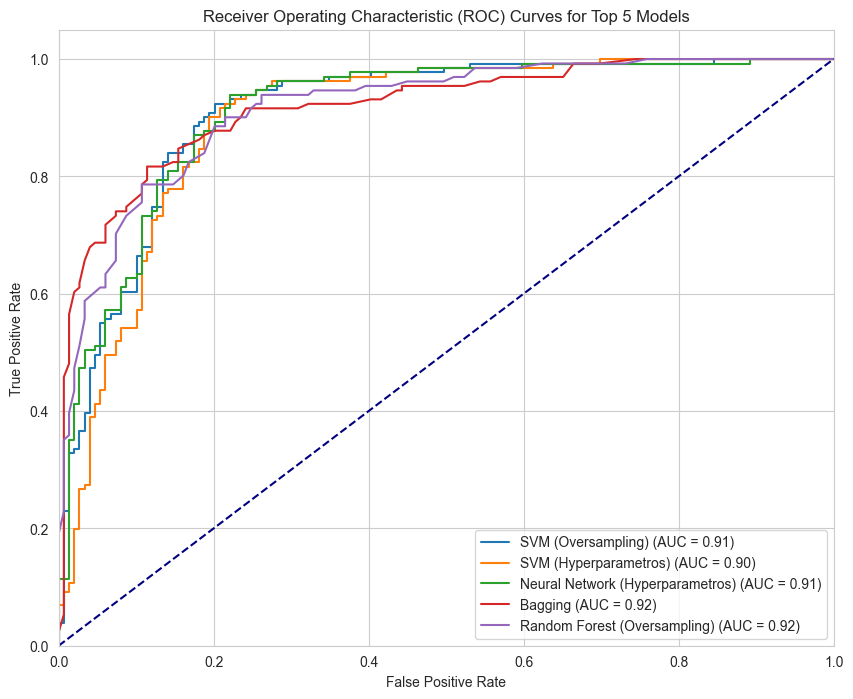

In [278]:
from sklearn.metrics import roc_curve, auc

# Seleccionar los cinco mejores modelos según Accuracy desde combined_results_sorted
top_models = combined_results_sorted.head(5)

# Diccionario para guardar las probabilidades predichas y el AUC de cada modelo
y_probs = {}
roc_auc = {}

# Buscar y calcular las probabilidades y las curvas ROC para los 5 mejores modelos
for index, row in top_models.iterrows():
    model_name = row['Modelo']

    # Identificar el tipo de modelo y buscar en el diccionario correspondiente
    if "Base" in model_name:
        model = models_base[model_name.replace(" (Base)", "")]
    elif "Oversampling" in model_name:
        model = models_over[model_name.replace(" (Oversampling)", "")]
    elif model_name == "Neural Network (Hyperparametros)":
        model = best_mlp    
    elif "Hyperparametros" in model_name:
        model = models_grid[model_name.replace(" (Hyperparametros)", "")]
    elif model_name == "Stacking":
        model = stacking_clf
    elif model_name == "Bagging":
        model = bagging_clf

    # Calcular probabilidades
    if hasattr(model, "predict_proba"):
        y_probs[model_name] = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_probs[model_name] = model.decision_function(X_test_scaled)
    
    # Calcular ROC y AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs[model_name], pos_label=2)
    roc_auc[model_name] = auc(fpr, tpr)

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))

for model_name in roc_auc.keys():
    fpr, tpr, _ = roc_curve(y_test, y_probs[model_name], pos_label=2)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc[model_name]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Top 5 Models')
plt.legend(loc="lower right")
plt.show()




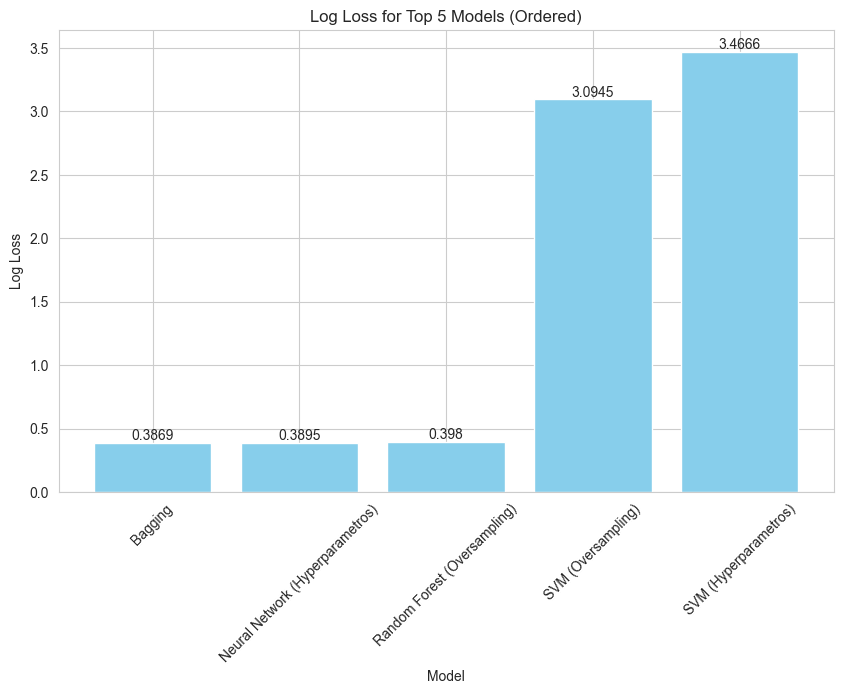

In [279]:
from sklearn.metrics import log_loss


# Diccionario para guardar el Log Loss de cada modelo
log_losses = {}

# Calcular el Log Loss para los 5 mejores modelos
for index, row in top_models.iterrows():
    model_name = row['Modelo']

    # Identificar el tipo de modelo y buscar en el diccionario correspondiente
    if "Base" in model_name:
        model = models_base[model_name.replace(" (Base)", "")]
    elif "Oversampling" in model_name:
        model = models_over[model_name.replace(" (Oversampling)", "")]
    elif model_name == "Neural Network (Hyperparametros)":
        model = best_mlp
    elif "Hyperparametros" in model_name:
        model = models_grid[model_name.replace(" (Hyperparametros)", "")]
    elif model_name == "Stacking":
        model = stacking_clf
    elif model_name == "Bagging":
        model = bagging_clf

    # Calcular probabilidades
    if hasattr(model, "predict_proba"):
        y_probs_logloss = model.predict_proba(X_test_scaled)
    else:
        # Para modelos que no tienen predict_proba, calcular las probabilidades como si fuera una probabilidad
        y_probs_logloss = model.decision_function(X_test_scaled)
        y_probs_logloss = np.vstack([1 - y_probs_logloss, y_probs_logloss]).T

    # Calcular Log Loss
    log_losses[model_name] = log_loss(y_test, y_probs_logloss)
    log_losses = dict(sorted(log_losses.items(), key=lambda item: item[1]))

# Graficar el Log Loss ordenado
plt.figure(figsize=(10, 6))
bars = plt.bar(log_losses.keys(), log_losses.values(), color='skyblue')

# Agregar los valores de Log Loss sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Log Loss for Top 5 Models (Ordered)')
plt.xticks(rotation=45)
plt.show()

In [280]:
# Añadir las columnas 'AUC-ROC' y 'Log Loss' al DataFrame para los top models
combined_results_sorted['AUC-ROC'] = combined_results_sorted['Modelo'].map(roc_auc)
combined_results_sorted['Log Loss'] = combined_results_sorted['Modelo'].map(log_losses)

# Ahora ordenamos el DataFrame por Accuracy, AUC-ROC y Log Loss
combined_results_sorted = combined_results_sorted.sort_values(
    by=['Accuracy', 'AUC-ROC', 'Log Loss'], 
    ascending=[False, False, True]
)

# Definir los modelos en función de los criterios
conclusion_variables = {
    "best_model": combined_results_sorted.iloc[0]['Modelo'],  # Mejor en todo
    "second_best_model": combined_results_sorted.iloc[1]['Modelo'],  # Segundo mejor en todo
    "third_best_model": combined_results_sorted.iloc[2]['Modelo'],  # Tercer mejor en todo
    "high_accuracy_low_logloss_model1": combined_results_sorted.iloc[-1]['Modelo'],  # Peor Log Loss
    "high_accuracy_low_logloss_model2": combined_results_sorted.iloc[-2]['Modelo']  # Segundo peor Log Loss
}

# Generar la conclusión utilizando la plantilla
conclusion_template = """
{best_model} tiene un buen balance entre las tres métricas: alta Accuracy, un buen AUC-ROC, y un Log Loss razonablemente bajo. Esto lo hace un modelo robusto y bien calibrado.

{second_best_model} y {third_best_model}, aunque tienen un AUC-ROC y Log Loss sobresalientes, su Accuracy es ligeramente inferior. Sin embargo, si el objetivo es tener predicciones bien calibradas y un buen equilibrio entre la sensibilidad y especificidad, estos modelos son muy fuertes candidatos.

{high_accuracy_low_logloss_model1} y {high_accuracy_low_logloss_model2}, a pesar de tener alta Accuracy y buen AUC-ROC, tienen un Log Loss muy alto, lo que sugiere que sus predicciones podrían no ser tan confiables en términos de probabilidad.
"""

conclusion = conclusion_template.format(**conclusion_variables)
print(conclusion)


SVM (Oversampling) tiene un buen balance entre las tres métricas: alta Accuracy, un buen AUC-ROC, y un Log Loss razonablemente bajo. Esto lo hace un modelo robusto y bien calibrado.

SVM (Hyperparametros) y Bagging, aunque tienen un AUC-ROC y Log Loss sobresalientes, su Accuracy es ligeramente inferior. Sin embargo, si el objetivo es tener predicciones bien calibradas y un buen equilibrio entre la sensibilidad y especificidad, estos modelos son muy fuertes candidatos.

Decision Tree (Base) y Decision Tree (Oversampling), a pesar de tener alta Accuracy y buen AUC-ROC, tienen un Log Loss muy alto, lo que sugiere que sus predicciones podrían no ser tan confiables en términos de probabilidad.

